In [ ]:
!mkdir data

In [ ]:
cd data

/content/data


In [ ]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy

--2023-07-04 15:02:59--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241421904 (230M) [application/octet-stream]
Saving to: ‘banana.npy’

banana.npy          100%[===================>] 230.24M   197MB/s    in 1.2s    

2023-07-04 15:03:00 (197 MB/s) - ‘banana.npy’ saved [241421904/241421904]



In [ ]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy

--2023-07-04 15:03:00--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113462128 (108M) [application/octet-stream]
Saving to: ‘apple.npy’

apple.npy           100%[===================>] 108.21M  26.0MB/s    in 4.0s    

2023-07-04 15:03:04 (27.1 MB/s) - ‘apple.npy’ saved [113462128/113462128]



In [ ]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pineapple.npy

--2023-07-04 15:03:04--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pineapple.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98055744 (94M) [application/octet-stream]
Saving to: ‘pineapple.npy’

pineapple.npy       100%[===================>]  93.51M   179MB/s    in 0.5s    

2023-07-04 15:03:05 (179 MB/s) - ‘pineapple.npy’ saved [98055744/98055744]



In [ ]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy

--2023-07-04 15:03:05--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121759200 (116M) [application/octet-stream]
Saving to: ‘grapes.npy’

grapes.npy          100%[===================>] 116.12M   195MB/s    in 0.6s    

2023-07-04 15:03:06 (195 MB/s) - ‘grapes.npy’ saved [121759200/121759200]



https://console.cloud.google.com/storage/browser/quickdraw_dataset/full%2Fnumpy_bitmap%2F;tab=objects?prefix=&forceOnObjectsSortingFiltering=false

In [ ]:
cd ..

/content


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.utils import np_utils

In [ ]:
import os
import glob
import numpy as np
from random import randint
from PIL import Image

from sklearn.model_selection import train_test_split as tts



In [ ]:
N_FRUITS= 4;
FRUITS={0:"apple", 1: "banana", 2: "grapes", 3: "pineapple"}
N=5000 #number of samples taken from each class
FILES={"apple.npy","banana.npy","grapes.npy","pineapple.npy"}
N_EPOCHS= 15

In [ ]:
def load(dir, files, reshaped):
    "Load .npy or .npz files from disk and return them as numpy arrays. \
    Takes in a list of filenames and returns a list of numpy arrays."

    data = []
    for file in files:
        f = np.load(dir + file)
        if reshaped:
            new_f = []
            for i in range(len(f)):
                x = np.reshape(f[i], (28, 28))
                x = np.expand_dims(x, axis=0)
                x = np.reshape(f[i], (28, 28, 1))
                new_f.append(x)
            f = new_f
        data.append(f)
    return data


def normalize(data):
    "Takes a list or a list of lists and returns its normalized form"

    return np.interp(data, [0, 255], [-1, 1])


def denormalize(data):
    "Takes a list or a list of lists and returns its denormalized form"

    return np.interp(data, [-1, 1], [0, 255])


def visualize(array):
    "Visulaze a 2D array as an Image"

    img = Image.fromarray(array)
    img.show(title="Visulizing array")


def set_limit(arrays, n):
    "Limit elements from each array up to n elements and return a single list"
    new = []
    for array in arrays:
        i = 0
        for item in array:
            if i == n:
                break
            new.append(item)
            i += 1
    return new


def make_labels(N1, N2):
    "make labels from 0 to N1, each repeated N2 times"
    labels = []
    for i in range(N1):
        labels += [i] * N2
    return labels

In [ ]:
# images need to be 28x28 for training with a ConvNet
fruits = load("data/", ['apple.npy'], reshaped=True)

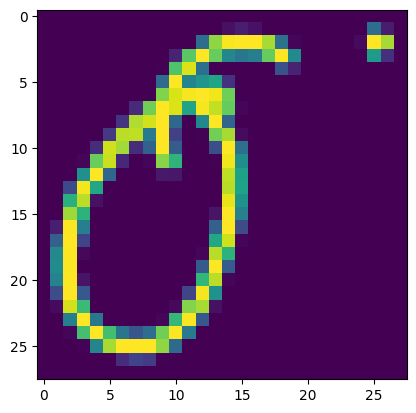

In [ ]:

import matplotlib.pyplot as plt
plt.imshow(fruits[0][0])

In [ ]:
# images need to be 28x28 for training with a ConvNet
fruits = load("data/", FILES, reshaped=True)

# images need to be flattened for training with an MLP
# fruits = load("data/", files, reshaped=False)


# limit no of samples in each class to N
fruits = set_limit(fruits, N)

# normalize the values
#fruits = map(normalize, fruits)

# define the labels
labels = make_labels(N_FRUITS, N)

# prepare the data
x_train, x_test, y_train, y_test = tts(fruits, labels, test_size=0.05)

# one hot encoding
Y_train = np_utils.to_categorical(y_train, N_FRUITS)
Y_test = np_utils.to_categorical(y_test, N_FRUITS)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N_FRUITS, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(np.array(x_train), np.array(Y_train), batch_size=32, epochs=N_EPOCHS, verbose=1,validation_split=0.2 )

Epoch 1/15
475/475 [==============================] - 47s 97ms/step - loss: 0.8734 - accuracy: 0.8459 - val_loss: 0.2154 - val_accuracy: 0.9326
Epoch 2/15
475/475 [==============================] - 46s 96ms/step - loss: 0.2754 - accuracy: 0.9124 - val_loss: 0.2046 - val_accuracy: 0.9382
Epoch 3/15
475/475 [==============================] - 46s 97ms/step - loss: 0.2273 - accuracy: 0.9301 - val_loss: 0.1717 - val_accuracy: 0.9453
Epoch 4/15
475/475 [==============================] - 44s 94ms/step - loss: 0.1904 - accuracy: 0.9408 - val_loss: 0.1525 - val_accuracy: 0.9539
Epoch 5/15
475/475 [==============================] - 46s 97ms/step - loss: 0.1593 - accuracy: 0.9483 - val_loss: 0.1515 - val_accuracy: 0.9518
Epoch 6/15
475/475 [==============================] - 44s 93ms/step - loss: 0.1336 - accuracy: 0.9564 - val_loss: 0.1705 - val_accuracy: 0.9526
Epoch 7/15
475/475 [==============================] - 46s 96ms/step - loss: 0.1234 - accuracy: 0.9585 - val_loss: 0.1454 - val_accuracy:

In [ ]:
y_prob = model.predict(np.array (x_test))

32/32 [==============================] - 1s 19ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
y_pred

array([2, 3, 3, 1, 3, 0, 3, 0, 0, 3, 0, 3, 1, 0, 3, 3, 0, 1, 2, 2, 2, 2,
       1, 1, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 0, 1, 0, 1, 3, 1, 1, 1, 3, 0, 1, 0, 1, 3, 1, 2, 3, 3, 3, 1,
       3, 0, 3, 0, 2, 1, 0, 0, 0, 0, 3, 2, 0, 1, 3, 1, 1, 1, 3, 0, 0, 0,
       0, 3, 0, 0, 2, 0, 1, 0, 0, 2, 3, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 2,
       1, 2, 2, 3, 3, 0, 3, 2, 0, 2, 3, 1, 1, 1, 0, 1, 3, 1, 0, 2, 3, 2,
       2, 0, 1, 1, 1, 3, 2, 1, 2, 1, 2, 3, 0, 2, 1, 3, 0, 3, 3, 0, 3, 0,
       3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 0, 1, 0, 0, 3, 3, 3, 3,
       3, 1, 2, 1, 0, 1, 3, 2, 1, 2, 3, 0, 3, 0, 0, 2, 1, 1, 0, 0, 0, 2,
       0, 1, 0, 2, 0, 1, 3, 3, 2, 3, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 3, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 3, 3, 2, 3, 2, 1, 0,
       0, 0, 0, 3, 0, 3, 3, 2, 2, 0, 3, 2, 1, 2, 0, 2, 1, 1, 3, 1, 3, 1,
       3, 0, 2, 3, 0, 2, 0, 0, 3, 0, 2, 0, 0, 0, 3, 1, 0, 2, 0, 1, 2, 2,
       2, 0, 3, 3, 3, 0, 0, 0, 2, 3, 1, 1, 2, 3, 2,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.array(y_test),y_pred)

0.961

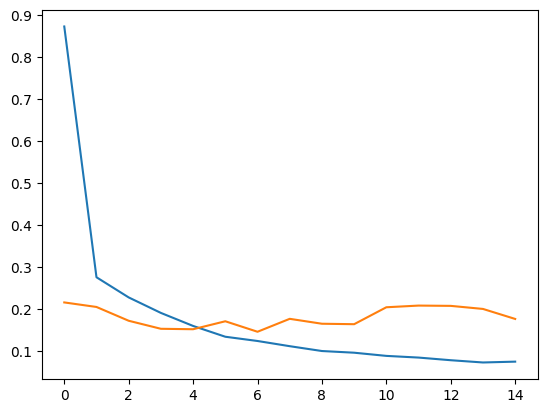

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

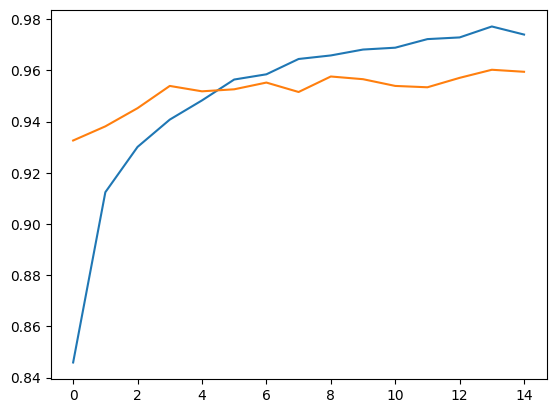

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

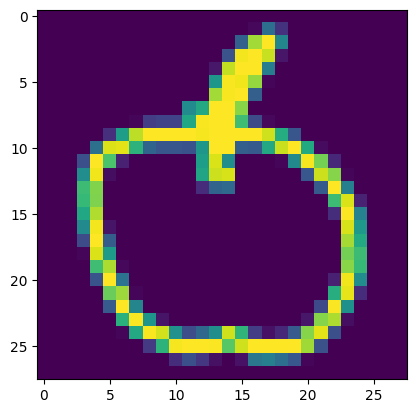

In [ ]:
plt.imshow(x_test[7])

In [ ]:
pred = FRUITS[np.argmax(model.predict(np.array([x_test[7]])))]
actual = FRUITS[y_test[7]]
print ("Actual:", actual)
print ("Predicted:", pred)

1/1 [==============================] - 0s 114ms/step
Actual: apple
Predicted: apple


In [ ]:
model.save("fruits.h5")